# Importing Librabries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Reading Dataset

In [2]:
dataset = pd.read_csv('dataset.csv')

# First Look at the Data

In [3]:
#Printing the first 5 columns\
dataset.head(5)

,YEAR,ANNUAL,Unnamed: 2,JAN-FEB,Unnamed: 4,MAR-MAY,Unnamed: 6,JUN-SEP,Unnamed: 8,OCT-DEC,Unnamed: 10
0,YEAR,MIN,MAX,MIN,MAX,MIN,MAX,MIN,MAX,MIN,MAX
1,1901,20.55,30.29,15.11,25.1,21.99,33.29,24.32,32,17.73,28.48
2,1902,20.45,30.4,14.61,27.14,22.43,33.49,24.24,31.73,17.31,27.71
3,1903,20.13,29.88,14.3,25.68,21.33,32.72,24.37,31.64,17.16,27.51
4,1904,20.06,29.8,13.99,25.53,21.8,32.67,23.87,31.27,17.29,27.83


The first thing we notice in the dataset is that the headers seem off. Looks like we might need to combine the header along with the first row to get the detailed header. This will make things easier as we continue to work on the dataset.

The rest of the data is pretty simple.
The first column contains the year - Followed by the minimum and maximum Annual Temperture. 
The remaining columns are the minimum and maximum temperature but broken over the months instead. 
The month grouping seems to be roughly based on the seasons seen in India. 

In [4]:
#Fixing the header names 

#Part 1: Getting all the current column names except the first
a = dataset.columns[1:].to_list()
print("The original headers are: ",a)
print("")

#Part 2: Getting all the first row values except the first 
b = dataset.iloc[0][1:].to_list()
print("The first row values are: ",b)
print("")

#Part 3: Concantenating Both Lists
c = [ a[x]+ " " + b[x] for x in range(len(a))]
print("The combined lists are: ",c)
print("")

#Part 4: Cleaning up the column nanmes 
d = ['YEAR'] + [ re.sub(r'[0-9]','',c[x].replace('Unnamed: ',c[x-1].split(' ')[0])) for x in range(len(c))]
print("The formatted lists are: ",d)
print("")

#Part 5: Assigning it back to the dataset
dataset.columns = d

#Dropping the first row of the dataset
dataset = dataset.iloc[1:,]

The original headers are:  ['ANNUAL', 'Unnamed: 2', 'JAN-FEB', 'Unnamed: 4', 'MAR-MAY', 'Unnamed: 6', 'JUN-SEP', 'Unnamed: 8', 'OCT-DEC', 'Unnamed: 10']

The first row values are:  ['MIN', 'MAX', 'MIN', 'MAX', 'MIN', 'MAX', 'MIN', 'MAX', 'MIN', 'MAX']

The combined lists are:  ['ANNUAL MIN', 'Unnamed: 2 MAX', 'JAN-FEB MIN', 'Unnamed: 4 MAX', 'MAR-MAY MIN', 'Unnamed: 6 MAX', 'JUN-SEP MIN', 'Unnamed: 8 MAX', 'OCT-DEC MIN', 'Unnamed: 10 MAX']

The formatted lists are:  ['YEAR', 'ANNUAL MIN', 'ANNUAL MAX', 'JAN-FEB MIN', 'JAN-FEB MAX', 'MAR-MAY MIN', 'MAR-MAY MAX', 'JUN-SEP MIN', 'JUN-SEP MAX', 'OCT-DEC MIN', 'OCT-DEC MAX']



In [5]:
#First 5 rows of the modified dataset
dataset.head(5)

,YEAR,ANNUAL MIN,ANNUAL MAX,JAN-FEB MIN,JAN-FEB MAX,MAR-MAY MIN,MAR-MAY MAX,JUN-SEP MIN,JUN-SEP MAX,OCT-DEC MIN,OCT-DEC MAX
1,1901,20.55,30.29,15.11,25.1,21.99,33.29,24.32,32,17.73,28.48
2,1902,20.45,30.4,14.61,27.14,22.43,33.49,24.24,31.73,17.31,27.71
3,1903,20.13,29.88,14.3,25.68,21.33,32.72,24.37,31.64,17.16,27.51
4,1904,20.06,29.8,13.99,25.53,21.8,32.67,23.87,31.27,17.29,27.83
5,1905,20.01,29.66,12.98,23.73,21,31.75,24.47,31.93,17.76,28.49


# Formatting The Dataset

## Dropping Null Values

In [6]:
#Checking the dataset for null rows
dataset[dataset.isnull().any(axis=1)]

,YEAR,ANNUAL MIN,ANNUAL MAX,JAN-FEB MIN,JAN-FEB MAX,MAR-MAY MIN,MAR-MAY MAX,JUN-SEP MIN,JUN-SEP MAX,OCT-DEC MIN,OCT-DEC MAX
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,ANNUAL,NaN,JAN-FEB,NaN,MAR-MAY,NaN,JUN-SEP,NaN,OCT-DEC,NaN
125,NaN,MIN,MAX,MIN,MAX,MIN,MAX,MIN,MAX,MIN,MAX


In [7]:
#Dropping the rows with null values
dataset = dataset.dropna()

#Checking the dataset for null rows
dataset[dataset.isnull().any(axis=1)]

,YEAR,ANNUAL MIN,ANNUAL MAX,JAN-FEB MIN,JAN-FEB MAX,MAR-MAY MIN,MAR-MAY MAX,JUN-SEP MIN,JUN-SEP MAX,OCT-DEC MIN,OCT-DEC MAX


## Checking Data Formats

In [8]:
dataset.dtypes
dataset = dataset.astype(float)
dataset.dtypes

YEAR           float64
ANNUAL MIN     float64
ANNUAL MAX     float64
JAN-FEB MIN    float64
JAN-FEB MAX    float64
MAR-MAY MIN    float64
MAR-MAY MAX    float64
JUN-SEP MIN    float64
JUN-SEP MAX    float64
OCT-DEC MIN    float64
OCT-DEC MAX    float64
dtype: object

# Data Analysis

In [9]:
dataset.iloc[:,1:].describe()

,ANNUAL MIN,ANNUAL MAX,JAN-FEB MIN,JAN-FEB MAX,MAR-MAY MIN,MAR-MAY MAX,JUN-SEP MIN,JUN-SEP MAX,OCT-DEC MIN,OCT-DEC MAX
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,20.238347,30.370909,14.472066,26.328182,21.747355,33.209091,24.092645,31.684050,17.431322,28.478430
std,0.292527,0.422710,0.518915,0.680796,0.426448,0.567402,0.231253,0.420735,0.499051,0.565572
min,19.430000,29.230000,12.660000,23.730000,20.660000,31.670000,23.420000,30.650000,15.870000,27.090000
25%,20.080000,30.010000,14.200000,25.860000,21.420000,32.830000,23.960000,31.400000,17.120000,28.020000
50%,20.230000,30.360000,14.560000,26.290000,21.780000,33.230000,24.070000,31.680000,17.420000,28.480000
75%,20.440000,30.700000,14.810000,26.780000,22.040000,33.600000,24.240000,31.960000,17.760000,28.860000
max,20.900000,31.540000,15.540000,28.070000,22.960000,34.820000,24.660000,32.760000,18.580000,29.870000


(1901.0, 2021.0)

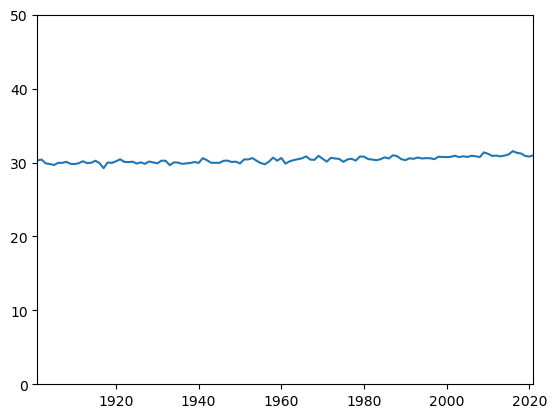

In [10]:
plt.plot(dataset['YEAR'],dataset['ANNUAL MAX'])
plt.ylim(0,50)
plt.xlim(1901,2021)

(1901.0, 2021.0)

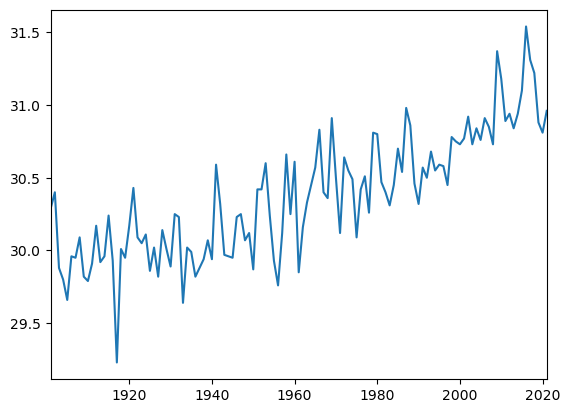

In [11]:
plt.plot(dataset['YEAR'],dataset['ANNUAL MAX'])
# plt.ylim(20,30)
plt.xlim(1901,2021)

In [12]:
#slope of the line 
print(np.polyfit(dataset['YEAR'],dataset['ANNUAL MAX'],1))

[9.95061645e-03 1.08577502e+01]


# Modelling

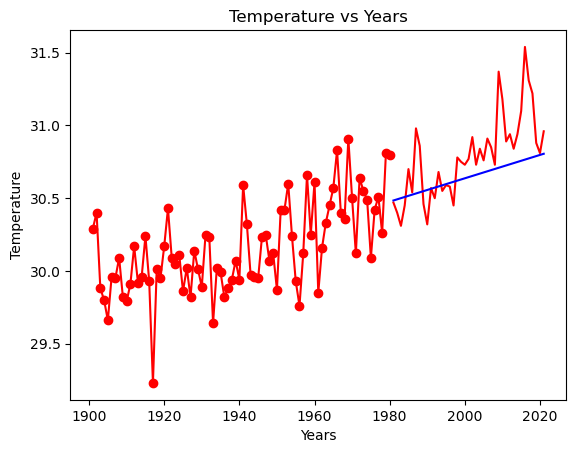

In [13]:
# Linear Regression

dataset.sort_values(by='YEAR',inplace=True)

X = dataset.iloc[:,0:1]
y = dataset.iloc[:,2:3]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3,random_state=0, shuffle=False)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

plt.scatter(X_train, y_train, color='red')
# plt.plot(X_train, regressor.predict(X_train),color='blue')
# plt.title('Temperature vs Years')
# plt.xlabel('Years')
# plt.ylabel('Temperature')
# plt.show()

plt.plot(X_train, y_train, color='red')
plt.plot(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict(X_test),color='blue')
plt.title('Temperature vs Years')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

# Model Valudation

In [15]:
# Evaluate the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.18760585400157742
Mean Squared Error: 0.06688714927333615
Root Mean Squared Error: 0.2586255000446324
R-squared: 0.14059394053355734


In [24]:
#Print Range of the target variable 
y.max() - y.min()

ANNUAL MAX    2.31
dtype: float64

# Prediction

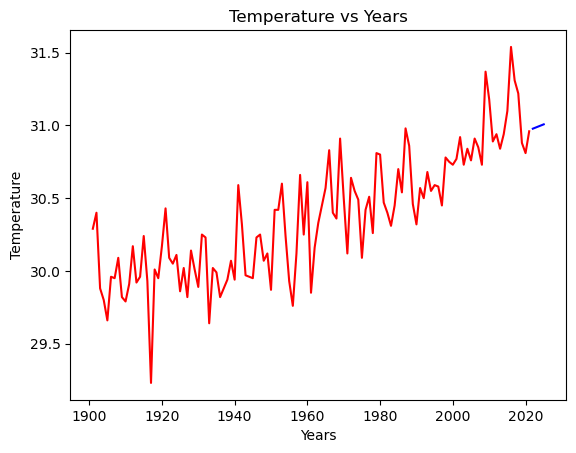

In [45]:
#Using the regression model to predict for the next one year
# Linear Regression

dataset.sort_values(by='YEAR',inplace=True)

X = dataset.iloc[:,0:1]
y = dataset.iloc[:,2:3]

regressor = LinearRegression()
regressor.fit(X, y)

#Creating new years to predict
test = pd.DataFrame({'YEAR': [2022,2023,2024,2025]})

y_pred = regressor.predict(test)

plt.plot(X, y, color='red')
plt.plot(test, y_pred,color='blue')
plt.title('Temperature vs Years')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()